In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/robi-datathon-30-qualifier-problem-1/boxes.csv
/kaggle/input/robi-datathon-30-qualifier-problem-1/sample submission 1.csv
/kaggle/input/robi-datathon-30-qualifier-problem-1/problem 1.csv
/kaggle/input/robi-datathon-30-qualifier-problem-1/purchase.csv


In [4]:
# Setting the seed for random number generation to ensure reproducibility
np.random.seed(42)

### Loading Datasets from CSV File

In [5]:
# Reading the purchase data from a CSV file
purchase_df = pd.read_csv('/kaggle/input/robi-datathon-30-qualifier-problem-1/purchase.csv')

# Reading the boxes data from a CSV file
boxes_df = pd.read_csv('/kaggle/input/robi-datathon-30-qualifier-problem-1/boxes.csv')

# Reading problem 1 data from a CSV file
problem1_df = pd.read_csv('/kaggle/input/robi-datathon-30-qualifier-problem-1/problem 1.csv')

In [6]:
purchase_df.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0


In [7]:
boxes_df.head()

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1,Premium,Home Delivery - CoD,0.0,2.7,9.96
1,2,Premium,Home Delivery - CoD,0.0,2.3,11.96
2,3,Premium,Home Delivery - CoD,0.0,2.4,11.96
3,4,Premium,Home Delivery - CoD,0.0,2.5,11.96
4,5,Premium,Home Delivery - CoD,0.0,2.6,11.96


In [8]:
problem1_df.head()

,MAGIC_KEY
0,28D5BB06356
1,293BEAB4E98
2,2962EE8065C
3,2957BE29EA9
4,28E351A0745


### Exploration and Feature Engineering

In [10]:
# Displaying information about the purchase_df DataFrame
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455864 entries, 0 to 2455863
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   PURCHASE_DATE  object 
 1   MAGIC_KEY      object 
 2   BOX_ID         float64
 3   BOX_COUNT      float64
dtypes: float64(2), object(2)
memory usage: 74.9+ MB


In [13]:
# Displaying information about the boxes_df DataFrame
boxes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BOX_ID           290 non-null    int64  
 1   QUALITY          290 non-null    object 
 2   DELIVERY_OPTION  290 non-null    object 
 3   MILK             290 non-null    float64
 4   MEAT             290 non-null    float64
 5   UNIT_PRICE       290 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 13.7+ KB


In [14]:
# Calculating the number of missing values in each column of the purchase_df DataFrame
missing_values_purchase = purchase_df.isnull().sum()

# Displaying the number of missing values for each column
missing_values_purchase

PURCHASE_DATE     0
MAGIC_KEY         0
BOX_ID           47
BOX_COUNT        47
dtype: int64

In [15]:
# how many total missing values do we have in purchase dataFrame?
total_cells = np.product(purchase_df.shape)
total_missing = missing_values_purchase.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0009568933784606966


In [17]:
# remove all the rows that contain a missing value
purchase_df.dropna(inplace=True)

In [18]:
# Convert 'BOX_ID' column in 'purchase' dataset to int64
purchase_df['BOX_ID'] = purchase_df['BOX_ID'].astype(int)

In [19]:
# Unique BOX_ID values in purchase_df
print(len(purchase_df['BOX_ID'].unique()))

# Unique BOX_ID values in boxes_df
print(len(boxes_df['BOX_ID'].unique()))

291
290


In [20]:
# Get unique values of 'BOX_ID' column in both dataframes
purchase_box_ids = set(purchase_df['BOX_ID'].unique())
boxes_box_ids = set(boxes_df['BOX_ID'].unique())

# Find the extra input(s) present in 'purchase_df' but not in 'boxes_df'
extra_box_ids = purchase_box_ids - boxes_box_ids
extra_box_ids

{11111111}

In [21]:
# Count occurrences of 11111111 in the 'BOX_ID' column of 'purchase_df'
extra_box_count = purchase_df['BOX_ID'].value_counts().get(11111111, 0)
extra_box_count

17

In [22]:
#merge the datasets based on 'BOX_ID'
merged_df = pd.merge(purchase_df, boxes_df, on='BOX_ID')
merged_df

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1/2/2019,2CED678A247,12,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
1,1/2/2019,2BF58D91BA1,12,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
2,1/2/2019,2C15B86534E,99,1.0,Premium,Delivery from Collection Point,0.0,3.3,13.96
3,1/2/2019,2C32D9A859A,6,1.0,Premium,Home Delivery - CoD,0.0,2.7,11.96
4,1/2/2019,2C7A55404D1,4,1.0,Premium,Home Delivery - CoD,0.0,2.5,11.96
...,...,...,...,...,...,...,...,...,...
2455795,28/10/2018,2BD992B5538,12,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
2455796,28/10/2018,2C97CD72233,17,1.0,Premium,Home Delivery - CoD,10.0,1.8,12.98
2455797,28/10/2018,2C91C61D372,40,1.0,Premium,Home Delivery - CoD,12.0,1.8,19.98
2455798,28/10/2018,2CD70CFC4E3,51,1.0,Premium,Home Delivery - CoD,18.0,2.9,23.98


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455800 entries, 0 to 2455799
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PURCHASE_DATE    object 
 1   MAGIC_KEY        object 
 2   BOX_ID           int64  
 3   BOX_COUNT        float64
 4   QUALITY          object 
 5   DELIVERY_OPTION  object 
 6   MILK             float64
 7   MEAT             float64
 8   UNIT_PRICE       float64
dtypes: float64(4), int64(1), object(4)
memory usage: 168.6+ MB


In [23]:
# Calculating the number of missing values in each column of the merged DataFrame
merged_df.isnull().sum()

PURCHASE_DATE      0
MAGIC_KEY          0
BOX_ID             0
BOX_COUNT          0
QUALITY            0
DELIVERY_OPTION    0
MILK               0
MEAT               0
UNIT_PRICE         0
dtype: int64

### Date Parsing

In [25]:
# Checking the data type of the 'PURCHASE_DATE' column in the merged DataFrame
merged_df['PURCHASE_DATE'].dtype

dtype('O')

In [26]:
# Calculating the lengths of the 'PURCHASE_DATE' values in the merged DataFrame
date_lengths = merged_df['PURCHASE_DATE'].str.len()

# Displaying the counts of different lengths of 'PURCHASE_DATE' values
date_lengths.value_counts()

PURCHASE_DATE
9     1189312
10     925964
8      340524
Name: count, dtype: int64

In [27]:
# Finding the indices where 'PURCHASE_DATE' values have length 10
indices = np.where([date_lengths == 10])[1]

# Locating the rows in the merged DataFrame corresponding to the identified indices
merged_df.loc[indices]

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
1247440,10/12/2018,2C544D856A4,163,1.0,Premium,Delivery from Collection Point,11.0,2.2,23.98
1247441,10/12/2018,2C1016C0523,163,1.0,Premium,Delivery from Collection Point,11.0,2.2,23.98
1247442,10/12/2018,2BEBDA48E97,134,1.0,Premium,Delivery from Collection Point,10.0,1.8,19.98
1247443,10/12/2018,2C4AEF1013C,163,1.0,Premium,Delivery from Collection Point,11.0,2.2,23.98
1247444,10/12/2018,2C796648549,77,1.0,Premium,Delivery from Collection Point,0.0,2.5,11.96
...,...,...,...,...,...,...,...,...,...
2455795,28/10/2018,2BD992B5538,12,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
2455796,28/10/2018,2C97CD72233,17,1.0,Premium,Home Delivery - CoD,10.0,1.8,12.98
2455797,28/10/2018,2C91C61D372,40,1.0,Premium,Home Delivery - CoD,12.0,1.8,19.98
2455798,28/10/2018,2CD70CFC4E3,51,1.0,Premium,Home Delivery - CoD,18.0,2.9,23.98


In [28]:
import datetime  # Importing datetime module for date manipulation

# Converting 'PURCHASE_DATE' column to datetime format using the specified format
merged_df['PURCHASE_DATE'] = pd.to_datetime(merged_df['PURCHASE_DATE'], format='%d/%m/%Y')

In [29]:
merged_df['PURCHASE_DATE'].head()

0   2019-02-01
1   2019-02-01
2   2019-02-01
3   2019-02-01
4   2019-02-01
Name: PURCHASE_DATE, dtype: datetime64[ns]

In [31]:
# Get the oldest and latest dates
oldest_date = merged_df['PURCHASE_DATE'].min()
latest_date = merged_df['PURCHASE_DATE'].max()

print("Oldest Date:", oldest_date)
print("Latest Date:", latest_date)
print('Time Duration:',latest_date-oldest_date)

Oldest Date: 2018-10-01 00:00:00
Latest Date: 2019-02-28 00:00:00
Time Duration: 150 days 00:00:00


In [32]:
# Extracting the day of the month from the 'PURCHASE_DATE' column
merged_df['DAY_OF_MONTH'] = merged_df['PURCHASE_DATE'].dt.day

# Calculating the cost by multiplying 'BOX_COUNT' and 'UNIT_PRICE'
merged_df['COST'] = merged_df['BOX_COUNT'] * merged_df['UNIT_PRICE']

# Displaying the first few rows of the merged DataFrame with the new columns added
merged_df.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,DAY_OF_MONTH,COST
0,2019-02-01,2CED678A247,12,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98,1,12.98
1,2019-02-01,2BF58D91BA1,12,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98,1,12.98
2,2019-02-01,2C15B86534E,99,1.0,Premium,Delivery from Collection Point,0.0,3.3,13.96,1,13.96
3,2019-02-01,2C32D9A859A,6,1.0,Premium,Home Delivery - CoD,0.0,2.7,11.96,1,11.96
4,2019-02-01,2C7A55404D1,4,1.0,Premium,Home Delivery - CoD,0.0,2.5,11.96,1,11.96


In [33]:
# Counting the occurrences of each unique value in the 'MAGIC_KEY' column
merged_df['MAGIC_KEY'].value_counts()

MAGIC_KEY
2CC2011C2DF    40
28D251217BD    38
2BFCB915234    36
29F30296E7B    35
29D9005EBAD    35
               ..
28FC671962A     1
2CAE521403B     1
2C0E6D5A8E7     1
2C24B6C0C25     1
2C4792A5B84     1
Name: count, Length: 1274087, dtype: int64

In [34]:
# Getting the unique values of the 'BOX_COUNT' column
merged_df['BOX_COUNT'].unique()

array([ 1.,  2.,  4.,  3.,  8.,  6.,  5.,  7.,  9., 19., 10., 11., 13.])

In [35]:
# Converting the string "2019-03-01" to datetime format
current_date = pd.to_datetime("2019-03-01")

# Finding the latest purchase date for each MAGIC_KEY
latest_purchase = merged_df.groupby(["MAGIC_KEY"])[['PURCHASE_DATE']].max()

# Calculating recency as the difference in days between current_date and the latest purchase date
latest_purchase['Recency'] = (current_date - latest_purchase['PURCHASE_DATE']).dt.days

# Dropping the 'PURCHASE_DATE' column to retain only 'Recency'
recency = latest_purchase.drop('PURCHASE_DATE', axis=1)

In [37]:
# Grouping the merged DataFrame by 'MAGIC_KEY' and counting the number of purchases for each MAGIC_KEY
frequency = merged_df.groupby(["MAGIC_KEY"]).count()[['PURCHASE_DATE']]

# Renaming the 'PURCHASE_DATE' column to 'Frequency'
frequency.rename(columns={'PURCHASE_DATE': 'Frequency'}, inplace=True)

In [38]:
# Calculating the average day of the month of purchases for each MAGIC_KEY
avg_day = merged_df.groupby(["MAGIC_KEY"])[['DAY_OF_MONTH']].mean()

# Renaming the 'DAY_OF_MONTH' column to 'avg_Day'
avg_day.rename(columns={'DAY_OF_MONTH': 'avg_Day'}, inplace=True)

In [39]:
customer_df = pd.concat([recency,frequency,avg_day], axis=1)
customer_df

,Recency,Frequency,avg_Day
MAGIC_KEY,,,
249670911D8,27,2,1.500000
249751FC4DD,140,1,12.000000
24978027606,133,1,19.000000
24979164422,91,1,30.000000
2497B8B4FDA,120,2,2.000000
...,...,...,...
2E6F72C6F1C,2,3,17.666667
2E6F8194908,6,1,23.000000
2E6F9C7B9B4,32,1,28.000000


## K-Means Clustering

In [40]:
from sklearn.cluster import KMeans  # Importing KMeans from scikit-learn for clustering
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

In [41]:
from sklearn.preprocessing import MinMaxScaler  # Importing MinMaxScaler from scikit-learn for feature scaling

# Creating an instance of MinMaxScaler
MMS = MinMaxScaler()

# Scaling the customer data
scaled_data = MMS.fit_transform(customer_df)

#### Finding out optimal value of K using the elbow method and davies bouldin score

In [42]:
# Defining the range of k values for the number of clusters
k_range = range(1, 11)

# Initializing an empty list to store the sum of squared errors (SSE) for each value of k
sse = []

# Looping through each value of k
for k in k_range:
    # Creating an instance of KMeans with k clusters
    km = KMeans(n_clusters=k, random_state=7)
    
    # Fitting the KMeans model to the scaled data and computing SSE
    km.fit_predict(scaled_data)
    
    # Appending the SSE to the list
    sse.append(km.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

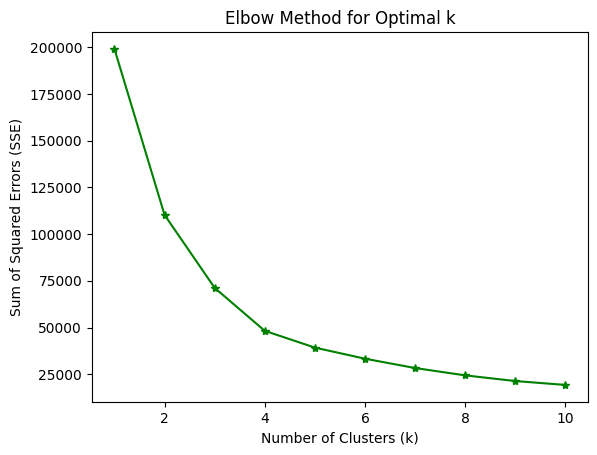

In [43]:
# Plotting the sum of squared errors (SSE) for different values of k
plt.plot(k_range, sse, 'g-*')

# Adding labels and title to the plot
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')

# Displaying the plot
plt.show()

In [44]:
from sklearn.cluster import KMeans  # Importing KMeans from scikit-learn for clustering
from sklearn.metrics import davies_bouldin_score  # Importing davies_bouldin_score for evaluating clustering quality

# Range of k values for the number of clusters
k_values = range(2, 11)

# List to store Davies-Bouldin scores for each value of k
davies_bouldin_scores = []

# Looping through each value of k
for k in k_values:
    # Creating an instance of KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=7)
    
    # Performing k-means clustering and obtaining cluster labels
    clusters = kmeans.fit_predict(scaled_data)
    
    # Computing the Davies-Bouldin index
    db_index = davies_bouldin_score(scaled_data, clusters)
    
    # Appending the Davies-Bouldin score to the list
    davies_bouldin_scores.append(db_index)

# Finding the optimal value of k with the lowest Davies-Bouldin index
optimal_k = k_values[davies_bouldin_scores.index(min(davies_bouldin_scores))]
print("Optimal number of clusters (k):", optimal_k)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters (k): 4


#### So, Optimal number of clusters k = 4

In [45]:
# Creating an instance of KMeans with 4 clusters
kmeans = KMeans(n_clusters=4)

# Fitting the KMeans model to the scaled data
kmeans.fit(scaled_data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [46]:
# Adding a new column 'Clusters' to the customer DataFrame containing the cluster labels
customer_df["Clusters"] = (kmeans.labels_ + 1)

# Displaying the customer DataFrame with cluster labels
customer_df

,Recency,Frequency,avg_Day,Clusters
MAGIC_KEY,,,,
249670911D8,27,2,1.500000,4
249751FC4DD,140,1,12.000000,1
24978027606,133,1,19.000000,3
24979164422,91,1,30.000000,3
2497B8B4FDA,120,2,2.000000,1
...,...,...,...,...
2E6F72C6F1C,2,3,17.666667,2
2E6F8194908,6,1,23.000000,2
2E6F9C7B9B4,32,1,28.000000,2


In [47]:
# Counting the number of customers in each cluster
customer_df['Clusters'].value_counts()

Clusters
2    422863
4    395312
1    231643
3    224269
Name: count, dtype: int64

In [48]:
# customer_df[(customer_df["Frequency"] == 1) & (customer_df["Recency"] > 35) & (customer_df["Clusters"] == 3)]

In [49]:
# customer_df[((customer_df["Frequency"] > 1) | (customer_df["Recency"] < 35)) & (customer_df["Clusters"] == 3)]

### Visualization for making preparations

In [57]:
# Merging customer_df with problem1_df on MAGIC_KEY and retaining only 'Frequency', 'avg_Day', and 'Clusters' columns
visual_df = pd.merge(customer_df[['Frequency', 'avg_Day', 'Clusters']].reset_index(), problem1_df, on='MAGIC_KEY')

# Displaying the merged DataFrame
visual_df

,MAGIC_KEY,Frequency,avg_Day,Clusters
0,2498CA210F2,2,5.500000,4
1,249BD4201E6,2,13.500000,4
2,249C911B64A,7,14.857143,2
3,249D123A385,3,25.000000,2
4,249DA1DC108,2,2.000000,4
...,...,...,...,...
58684,297D14BF319,5,15.000000,2
58685,297D17F1EED,5,11.400000,4
58686,297D18E7B24,5,19.400000,2
58687,297D1A68BFD,5,9.800000,4


In [59]:
# Standardizing the 'Frequency' and 'avg_Day' columns
st_freq = (visual_df['Frequency'] - visual_df['Frequency'].min()) / (visual_df['Frequency'].max() - visual_df['Frequency'].min())
st_aDay = (visual_df['avg_Day'] - visual_df['avg_Day'].min()) / (visual_df['avg_Day'].max() - visual_df['avg_Day'].min())

In [60]:
# Obtaining the cluster centers
clusters = kmeans.cluster_centers_

# Displaying the cluster centers
clusters

array([[0.76410992, 0.00540199, 0.24155496],
       [0.09946193, 0.03499896, 0.67818535],
       [0.61357034, 0.00809578, 0.72166711],
       [0.1973851 , 0.03144752, 0.27412142]])

In [61]:
# Extracting the cluster labels from the DataFrame
labels = visual_df['Clusters']

# Counting the number of occurrences of each cluster label
labels.value_counts()

Clusters
2    29545
4    29139
3        5
Name: count, dtype: int64

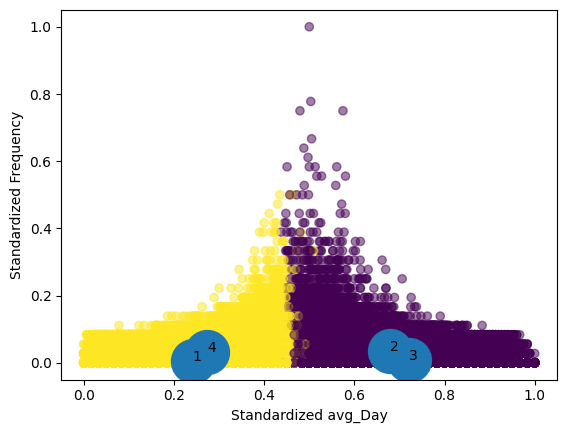

In [62]:
# Creating a scatter plot of standardized avg_Day vs Frequency, colored by cluster labels
plt.scatter(st_aDay, st_freq, c=labels, alpha=0.5)

# Adding cluster centers to the plot
plt.scatter(clusters[:, 2], clusters[:, 1], s=1000)

# Adding cluster numbers to the cluster centers
for i in range(4):
    plt.text(clusters[i, 2], clusters[i, 1], i + 1)

# Adding labels to the axes
plt.xlabel('Standardized avg_Day')
plt.ylabel('Standardized Frequency')

# Displaying the plot
plt.show()

In [63]:
# Calculating the mean values of Recency, Frequency, and avg_Day for each cluster
result = customer_df.groupby("Clusters").mean()[["Recency", "Frequency", "avg_Day"]]

# Displaying the mean values for each cluster
result

,Recency,Frequency,avg_Day
Clusters,,,
1,115.616487,1.210678,8.246649
2,15.908928,2.363241,21.353827
3,93.035698,1.315719,22.650041
4,30.597520,2.228501,9.232481


### Making Prediction

In [96]:
def predict(row):
    if ((row["Frequency"] < 5) and (row["Recency"] > 45)):
        return 'N'
    elif ((row["Clusters"] == 4 and row["avg_Day"] <= 15) or (row["Clusters"] == 2 and row["avg_Day"] <= 15) or (row["Frequency"] >= 15)):
        return 'Y'
    else:
        return 'N'

In [97]:
# Applying the predict function to each row of the customer DataFrame and storing the result in a new column 'PURCHASE'
customer_df['PURCHASE'] = customer_df.apply(predict, axis=1)

# Displaying the customer DataFrame with the 'PURCHASE' column added
customer_df

,Recency,Frequency,avg_Day,Clusters,PURCHASE
MAGIC_KEY,,,,,
249670911D8,27,2,1.500000,4,Y
249751FC4DD,140,1,12.000000,1,N
24978027606,133,1,19.000000,3,N
24979164422,91,1,30.000000,3,N
2497B8B4FDA,120,2,2.000000,1,N
...,...,...,...,...,...
2E6F72C6F1C,2,3,17.666667,2,N
2E6F8194908,6,1,23.000000,2,N
2E6F9C7B9B4,32,1,28.000000,2,N


In [98]:
# Extracting the 'PURCHASE' column and resetting the index
prediction = customer_df[['PURCHASE']].reset_index()

# Displaying the DataFrame containing the predictions
prediction

,MAGIC_KEY,PURCHASE
0,249670911D8,Y
1,249751FC4DD,N
2,24978027606,N
3,24979164422,N
4,2497B8B4FDA,N
...,...,...
1274082,2E6F72C6F1C,N
1274083,2E6F8194908,N
1274084,2E6F9C7B9B4,N
1274085,2E6FB0EBB32,N


In [99]:
# Counting the number of occurrences of each prediction value
prediction['PURCHASE'].value_counts()

PURCHASE
N    980235
Y    293852
Name: count, dtype: int64

In [100]:
# Filter the submission DataFrame to include only the common MAGIC_KEY values
submission_df = pd.merge(prediction, problem1_df, on='MAGIC_KEY')
submission_df

,MAGIC_KEY,PURCHASE
0,2498CA210F2,Y
1,249BD4201E6,Y
2,249C911B64A,Y
3,249D123A385,N
4,249DA1DC108,Y
...,...,...
58684,297D14BF319,Y
58685,297D17F1EED,Y
58686,297D18E7B24,N
58687,297D1A68BFD,Y


In [101]:
# Counting the number of occurrences of each prediction value in the submission DataFrame
submission_df['PURCHASE'].value_counts()

PURCHASE
N    32400
Y    26289
Name: count, dtype: int64

In [102]:
# Saving the submission DataFrame to a CSV file without including the index
submission_df.to_csv('Submission.csv', index=False)

In [103]:
# Reading the saved CSV file back into a DataFrame
pd.read_csv('/kaggle/working/Submission.csv')

,MAGIC_KEY,PURCHASE
0,2498CA210F2,Y
1,249BD4201E6,Y
2,249C911B64A,Y
3,249D123A385,N
4,249DA1DC108,Y
...,...,...
58684,297D14BF319,Y
58685,297D17F1EED,Y
58686,297D18E7B24,N
58687,297D1A68BFD,Y
